In [82]:
import numpy as mp
import pandas as pd
import pyomo.environ as pyo
import matplotlib.pyplot as plt

In [83]:
min_15 = True

if min_15:
    csv_path = 'data/dispatch_results_15.csv'
else:
    csv_path = 'data/dispatch_results.csv'

# csv_path = 'data/clean_spot_price_01:11:2025.csv'

df = pd.read_csv(csv_path)

df['cumulative profit'] = df['profit_EUR'].cumsum()
x = df['t']
y1 = df['price']
y2 = df['soc_percent']
y3 = df['cumulative profit']

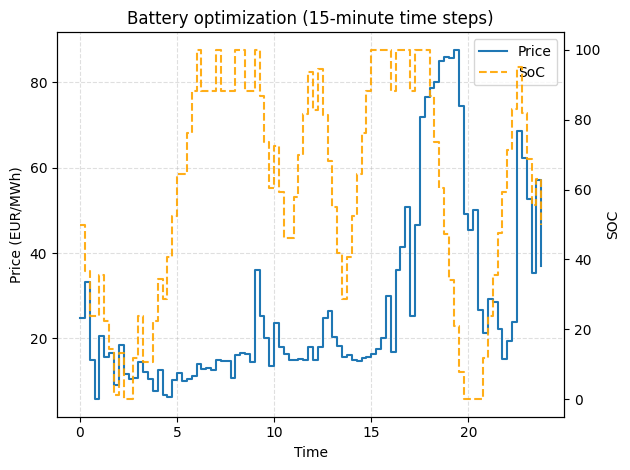

In [84]:
fig, ax1 = plt.subplots()

# Left axis: Price
l1, = ax1.step(
    x,
    y1,
    where="post",
    label="Price",
)
ax1.set_ylabel("Price (EUR/MWh)")
ax1.grid(True, linestyle="--", alpha=0.4)

# Right axis: SOC
ax2 = ax1.twinx()
l2, = ax2.step(
    x,
    y2,
    where="post",
    label="SoC",
    linestyle="--",
    color="orange",
    alpha=0.9
)
ax2.set_ylabel("SOC")

# Shared elements
ax1.set_xlabel("Time")
ax1.set_title("Battery optimization (15-minute time steps)")

# Single legend for both axes
ax1.legend(handles=[l1, l2], loc="best")

fig.tight_layout()
plt.show()


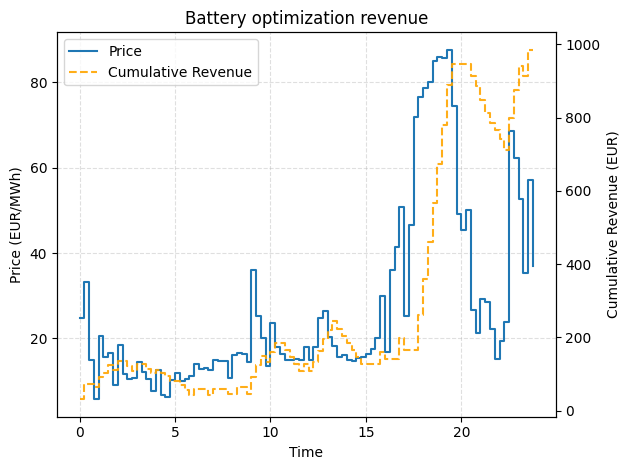

In [85]:
fig, ax1 = plt.subplots()

# Left axis: Price
l1, = ax1.step(
    x,
    y1,
    where="post",
    label="Price",
)
ax1.set_ylabel("Price (EUR/MWh)")
ax1.grid(True, linestyle="--", alpha=0.4)

# Right axis: SOC
ax2 = ax1.twinx()
l2, = ax2.step(
    x,
    y3,
    where="post",
    label="Cumulative Revenue",
    linestyle="--",
    color="orange",
    alpha=0.9
)
ax2.set_ylabel("Cumulative Revenue (EUR)")

# Shared elements
ax1.set_xlabel("Time")
ax1.set_title("Battery optimization revenue")

# Single legend for both axes
ax1.legend(handles=[l1, l2], loc="best")

fig.tight_layout()
plt.show()
